In [1]:
from datetime import datetime

In [2]:
print(datetime.now())

2021-04-13 14:02:58.908458


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [4]:
# !pip install pyldavis

In [5]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

### пункт 0

Загрузите датасет с помощью функции fetch_20newsgroups

In [6]:
d = fetch_20newsgroups(remove=('headers', 'footer', 'quotes')).data

Токенизируйте и удалите стоп-слова

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [8]:
tokenizer = RegexpTokenizer(r"\w+")
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [9]:
d_tok = [tokenizer.tokenize(doc.lower()) for doc in d]
d_stop = [[word for word in doc if word not in stop_words] for doc in d_tok]
d_prep = [' '.join(doc) for doc in d_stop]

### part 1: LDA из sklearn

- Однопоточный, неэффективный.
- Совместим в векторайзерами sklearn
- легко использовать

### пункт 1

1) создайте объект класса CountVectorizer 

2) примените его к вашей коллекции, причем так, чтобы коллекция документов была представлена не всеми словами из словаря, а только 1000 словами, которые наиболее часто встречаются в коллекции

(для этого надо воспользоваться методом fit_transform и указать соответствующий параметр)

In [10]:
cv = CountVectorizer(max_features=1000)
cv_prep = CountVectorizer(max_features=1000)

transformed_dataset = cv.fit_transform(d)
transformed_dataset_prep = cv_prep.fit_transform(d_prep)

### пункт 2
Получите названия тех топ-1000 слов, которые вы только что закодировали векторайзером

In [11]:
tf_feature_names = cv.get_feature_names()
tf_feature_names_prep = cv_prep.get_feature_names()
assert len(tf_feature_names) == 1000
assert len(tf_feature_names_prep) == 1000

Обучите LatentDirichletAllocation из sklearn со следующими параметрами n_topics=20, max_iter=50, learning_method='batch'

In [12]:
n_topics=20

In [13]:
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50)
lda_prep = LatentDirichletAllocation(n_components=n_topics, max_iter=50)

In [14]:
lda.fit(transformed_dataset)

LatentDirichletAllocation(max_iter=50, n_components=20)

In [15]:
lda_prep.fit(transformed_dataset_prep)

LatentDirichletAllocation(max_iter=50, n_components=20)

Воспользуйтесь следующей функцией, чтобы вывести ключевые слова конкретной темы.

In [16]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic {}:'.format(topic_idx))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [17]:
n_top_words = 10

In [18]:
print_top_words(lda, tf_feature_names, n_top_words)

Topic 0:
the to of and is be key will in this
Topic 1:
the to it and of is in that on for
Topic 2:
the of and in to by for from as was
Topic 3:
given cases max defense follow cost each killed size 40
Topic 4:
edu university com cs db uk ca internet fax and
Topic 5:
you to your if it do that can are have
Topic 6:
to for me any thanks please anyone this in if
Topic 7:
ax max g9v b8f pl giz 2tm 1t a86 bhj
Topic 8:
10 00 15 25 12 11 20 14 16 13
Topic 9:
the and of to for in is on file from
Topic 10:
my com of the opinions and on for dod me
Topic 11:
for and or in with price new are to all
Topic 12:
the is of that to it not in and are
Topic 13:
the and was he to that they in of it
Topic 14:
the in and to game he team for of year
Topic 15:
the and drive with to card scsi for disk mac
Topic 16:
the to is it and with on have windows this
Topic 17:
the of to and is that in god not we
Topic 18:
the to we and of that in for have on
Topic 19:
145 a86 0d b8f 34u 2di 0t 1d9 cx pl


In [19]:
print_top_words(lda_prep, tf_feature_names_prep, n_top_words)

Topic 0:
people going money president work us government well like time
Topic 1:
com thanks please mail anyone email help send uk post
Topic 2:
db cx water w7 cs al ah 17 chz pro
Topic 3:
drive scsi disk hard drives controller tape floppy ide system
Topic 4:
game team year games play season hockey win last league
Topic 5:
law gun government state guns rights crime police control bill
Topic 6:
windows card bit memory problem mac video system color os
Topic 7:
god jesus one bible christian believe church faith life christians
Topic 8:
dos price software new fax phone mail sale offer computer
Topic 9:
file files ftp program image output pub anonymous entry directory
Topic 10:
like one time car much com well new back little
Topic 11:
one people well like question point way case since much
Topic 12:
window available __ server ___ application code sun version motif
Topic 13:
said one people us time went told like day came
Topic 14:
university mr research new 1993 health stephanopoulos april 

### Метрики: перплексия

In [20]:
lda.perplexity(transformed_dataset)

190.3912907150719

In [21]:
lda_prep.perplexity(transformed_dataset_prep)

281.2291478183774

### Визуализация

In [22]:
skl_lda = pyLDAvis.sklearn.prepare(lda, transformed_dataset, cv)
pyLDAvis.display(skl_lda)

In [23]:
skl_lda_prep = pyLDAvis.sklearn.prepare(lda_prep, transformed_dataset_prep, cv_prep)
pyLDAvis.display(skl_lda_prep)

### part 2: Gensim

- Неэффективный.
- Совместим в векторайзерами sklearn.
- Легко использовать.
- Поддерживает несколько входных форматов.

Преобразуйте корпус следующим образом

In [24]:
import gensim

/home/tshamardina/anaconda3/envs/bigartm/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/home/tshamardina/anaconda3/envs/bigartm/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [25]:
corpus = gensim.matutils.Sparse2Corpus(transformed_dataset_prep, documents_columns=False)

### пункт 3
Заполните словарь id2word в виде {индекс:слово}

In [26]:
# id2word = {i:word for i, word in enumerate(tf_feature_names)}

Сформируйте словарь из CountVectorizer

In [27]:
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, 
                                                   id2word=dict((i, word) for word, i in cv_prep.vocabulary_.items()))

### пункт 4
Обучите модель LDA из gensim (для этого надо воспользоваться gensim.models.ldamodel.LdaModel)

In [28]:
lda_gensim = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary)

Выведите наиболее вероятные слова для каждой темы

In [29]:
lda_gensim.print_topics(lda_gensim.num_topics)

[(0,
  '0.041*"file" + 0.036*"entry" + 0.029*"section" + 0.019*"program" + 0.016*"image" + 0.015*"output" + 0.014*"build" + 0.013*"rules" + 0.013*"code" + 0.012*"input"'),
 (1,
  '0.026*"one" + 0.016*"time" + 0.015*"day" + 0.015*"stuff" + 0.015*"home" + 0.014*"two" + 0.014*"much" + 0.009*"deleted" + 0.008*"times" + 0.008*"got"'),
 (2,
  '0.020*"people" + 0.019*"one" + 0.015*"like" + 0.015*"us" + 0.010*"well" + 0.009*"god" + 0.009*"time" + 0.008*"said" + 0.008*"going" + 0.007*"way"'),
 (3,
  '0.026*"space" + 0.014*"president" + 0.011*"research" + 0.010*"nasa" + 0.010*"national" + 0.009*"technology" + 0.009*"information" + 0.009*"new" + 0.009*"data" + 0.008*"university"'),
 (4,
  '0.029*"db" + 0.023*"cs" + 0.021*"alt" + 0.019*"one" + 0.018*"food" + 0.017*"david" + 0.017*"al" + 0.014*"post" + 0.012*"group" + 0.012*"question"'),
 (5,
  '0.020*"people" + 0.018*"israel" + 0.016*"turkish" + 0.015*"armenian" + 0.015*"government" + 0.014*"said" + 0.014*"jews" + 0.013*"war" + 0.012*"armenians" +

### Метрики: перплексия

In [30]:
lda_gensim.log_perplexity(corpus)

-5.784723607034375

### Визуализация

In [31]:
gsm_lda = pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary=dictionary)
gsm_lda

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.071067  0.095565       1        1  14.445914
12     0.590496  0.128912       2        1  13.583253
11    -0.028992 -0.033673       3        1   8.285498
3     -0.035104 -0.011316       4        1   6.469553
7     -0.057924  0.093412       5        1   6.089658
19    -0.057851  0.027572       6        1   5.587341
5     -0.035746  0.042398       7        1   5.182397
9      0.151253 -0.312479       8        1   4.498890
1     -0.059279  0.030567       9        1   3.838300
10    -0.063087  0.041106      10        1   3.796020
18    -0.015872 -0.019832      11        1   3.718889
8     -0.060457  0.058963      12        1   3.591324
6     -0.023984 -0.046901      13        1   3.548085
17    -0.061638  0.046891      14        1   3.170239
13    -0.035847 -0.042673      15        1   2.968695
16    -0.051791  0.006822      16        1   2.967869
15     0.015205 -0.172518      17        1   2.520110
0     -0.005929 -0.020404      18        1   2.388743
14    -0.042278  0.027555      19        1   1.901022
4     -0.050106  0.060032      20        1   1.448197, topic_info=       Term          Freq         Total Category  logprob  loglift
923      ax  58996.000000  58996.000000  Default  30.0000  30.0000
684     max   4411.000000   4411.000000  Default  29.0000  29.0000
563     god   2576.000000   2576.000000  Default  28.0000  28.0000
937      0d   2066.000000   2066.000000  Default  27.0000  27.0000
105     com   3050.000000   3050.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
65     like     62.963092   4353.201690  Topic20  -4.9462  -0.0013
116  things     44.895490   1355.669907  Topic20  -5.2844   0.8271
815      mr     43.121149   1188.123275  Topic20  -5.3247   0.9187
25   number     44.686745   1460.056529  Topic20  -5.2890   0.7483
0    anyone     41.963086   1763.397673  Topic20  -5.3519   0.4966

[942 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
752       1  0.004323    00
752       2  0.001081    00
752       3  0.008646    00
752       4  0.012968    00
752       6  0.018372    00
...     ...       ...   ...
290      15  0.147809  york
290      16  0.024132  york
290      17  0.479625  york
290      18  0.003017  york
290      20  0.003017  york

[10215 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 13, 12, 4, 8, 20, 6, 10, 2, 11, 19, 9, 7, 18, 14, 17, 16, 1, 15, 5])

### пункт 5
Обучите модель LSI из gensim (для этого надо воспользоваться gensim.models.lsimodel.LsiModel)

In [32]:
lsi = gensim.models.lsimodel.LsiModel(corpus, num_topics=n_topics, id2word=dictionary)

Выведите наиболее вероятные слова для каждой темы

In [33]:
lsi.print_topics(lsi.num_topics)

[(0,
  '0.997*"ax" + 0.072*"max" + 0.016*"g9v" + 0.012*"b8f" + 0.010*"a86" + 0.009*"pl" + 0.007*"1d9" + 0.006*"1t" + 0.006*"145" + 0.006*"bhj"'),
 (1,
  '-0.387*"145" + -0.379*"a86" + -0.374*"b8f" + -0.360*"g9v" + -0.325*"0d" + -0.227*"1d9" + -0.211*"0t" + -0.187*"2di" + -0.173*"_o" + -0.170*"34u"'),
 (2,
  '-0.313*"file" + -0.214*"one" + -0.135*"available" + -0.132*"people" + -0.122*"program" + -0.122*"db" + -0.121*"information" + -0.112*"com" + -0.112*"new" + -0.107*"pub"'),
 (3,
  '0.966*"db" + 0.146*"cs" + 0.088*"al" + 0.079*"cx" + -0.064*"file" + 0.062*"bits" + 0.038*"inc" + -0.022*"program" + 0.022*"call" + -0.022*"available"'),
 (4,
  '0.675*"g9v" + -0.509*"0d" + -0.332*"_o" + 0.183*"b8f" + -0.129*"145" + -0.128*"6um" + 0.113*"1d9" + -0.111*"6ei" + -0.097*"3t" + -0.088*"75u"'),
 (5,
  '0.261*"10" + 0.247*"14" + 0.237*"16" + 0.202*"25" + 0.201*"12" + 0.196*"15" + 0.193*"20" + 0.188*"13" + 0.183*"00" + 0.182*"11"'),
 (6,
  '-0.590*"g9v" + -0.446*"0d" + 0.291*"b8f" + -0.283*"_o" + 

### Метрики: согласованность

Для измерения согласованности воспользуйтесь gensim.models.CoherenceModel с метрикой coherence='c_v'. В тексты передается токенизированный текст

In [34]:
coherence_model_lsi = gensim.models.CoherenceModel(model=lsi, texts=d_tok, coherence='c_v', topn=n_top_words)
coherence_model_lda = gensim.models.CoherenceModel(model=lda_gensim, texts=d_tok, coherence='c_v', topn=n_top_words)

In [35]:
coherence_lda = coherence_model_lda.get_coherence()
coherence_lsi = coherence_model_lsi.get_coherence()
print('LDA: ', coherence_lda)
print('LSI: ', coherence_lsi)

LDA:  0.5978502383560277
LSI:  0.5822382776943298


Какая модель по вашему мнению лучше выделила темы?

# part 3: BigARTM

In [36]:
# !pip install bigartm

In [37]:
with open('fetch20newsgroups.txt', 'w', encoding='utf-8') as file:
    print(' |text ', *d_prep, sep='\n |text ', file=file)

In [38]:
import artm
import matplotlib.pyplot as plt

Считывание данных из файла. Запись идет в батчи, из них же можно считавать, если у вас есть уже готовые данные в таком формате.

In [39]:
batch_vectorizer = artm.BatchVectorizer(data_path="fetch20newsgroups.txt", data_format="vowpal_wabbit", target_folder="batches", batch_size=100)

Задание словаря

In [40]:
dict_artm = batch_vectorizer.dictionary

Создание модели

In [41]:
model_artm = artm.ARTM(num_topics=n_topics, topic_names=[str(i) for i in range(n_topics)], class_ids={"text":1})

Задание метрик

In [42]:
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore', dictionary=dict_artm))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"))
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_artm.scores.add(artm.TopTokensScore(name="top_words", num_tokens=n_top_words, class_id="text"))

Инициализация модели

In [43]:
model_artm.initialize(dictionary=dict_artm)

Обучение

In [44]:
model_artm.num_document_passes = 1
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

Перплексия:

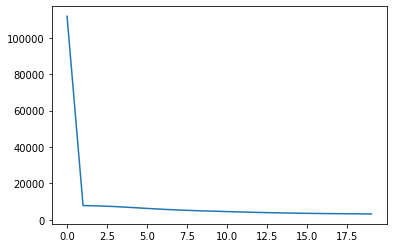

In [45]:
plt.plot(model_artm.score_tracker["PerplexityScore"].value)

Посмотрим на темы:

In [46]:
for topic_name, list_tokens in model_artm.score_tracker["top_words"].last_tokens.items():
    print(topic_name+': ', *list_tokens, '\n')

0:  fact israel one time true church first much agree human 

1:  ax max q 3 p g9v b8f 7 a86 n 

2:  one two chip much really well however like people key 

3:  new information control gun please internet anyone technology university research 

4:  people government armenian turkish war armenians president today state 000 

5:  x file program window c ftp server available files output 

6:  power 10 ground 50 ca please 100 new box computer 

7:  db like com cs people soon day us one call 

8:  1 0 2 5 3 10 4 8 7 14 

9:  god people jesus believe life us one christians bible jews 

10:  com new mail john book list news like phone university 

11:  year game team games play first last season hockey win 

12:  one like car __ still dod ___ time something well 

13:  w 1 u z x c v 8 b k 

14:  2 3 4 e 6 5 7 8 9 00 

15:  r g p q l h c v k b 

16:  drive system bit scsi pc windows disk space memory mac 

17:  key one like time way used encryption number etc public 

18:  one said going us n

Разреженность матриц:

In [47]:
print(model_artm.score_tracker["SparsityPhiScore"].last_value)
print(model_artm.score_tracker["SparsityThetaScore"].last_value)

0.42629292607307434
0.010446310043334961


Попробуйте использовать разреживающий регуляризатор для матрицы фи:

In [48]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-100, dictionary=dict_artm))

In [49]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [50]:
print(model_artm.score_tracker["SparsityPhiScore"].last_value)
print(model_artm.score_tracker["SparsityThetaScore"].last_value)

0.9010074734687805
0.052390631288290024


Попробуйте поменять коэффициент регуляризации:

In [51]:
model_artm.regularizers['SparsePhi'].tau = -8*1e4

In [52]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

In [53]:
for topic_name, list_tokens in model_artm.score_tracker["top_words"].last_tokens.items():
    print(topic_name+': ', *list_tokens, '\n')

0:  must point case question fact true without mean wrong reason 

1:  ax max q 3 g9v b8f a86 pl 1d9 0t 

2:  one two much first since find sure look law however 

3:  new information 1993 general control gun research national center technology 

4:  people government state today american armenian turkish jews war rights 

5:  x file set window code program source sun server output 

6:  power high price 100 box current low black 50 original 

7:  years day found times place db long days ago cause 

8:  1 0 10 15 20 14 12 30 11 16 

9:  god people believe world jesus life man word christian bible 

10:  com please mail university list ca email send group anyone 

11:  year last game team play games win season hockey first 

12:  like little old car great thing away anyone around better 

13:  w c u z x v b k cx w7 

14:  2 3 4 5 7 8 6 9 e 00 

15:  r g p n l h b f q j 

16:  system windows drive problem bit card problems dos scsi pc 

17:  time way used like might number key etc read p

In [54]:
print(model_artm.score_tracker["SparsityPhiScore"].last_value)
print(model_artm.score_tracker["SparsityThetaScore"].last_value)

0.942680835723877
0.2443835586309433


In [55]:
print(datetime.now())

2021-04-13 14:13:19.738069
